In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
boston=load_boston()

In [8]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
bos['Price']=boston.target

In [15]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [65]:
def adj_r2(x,y,regression):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [58]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


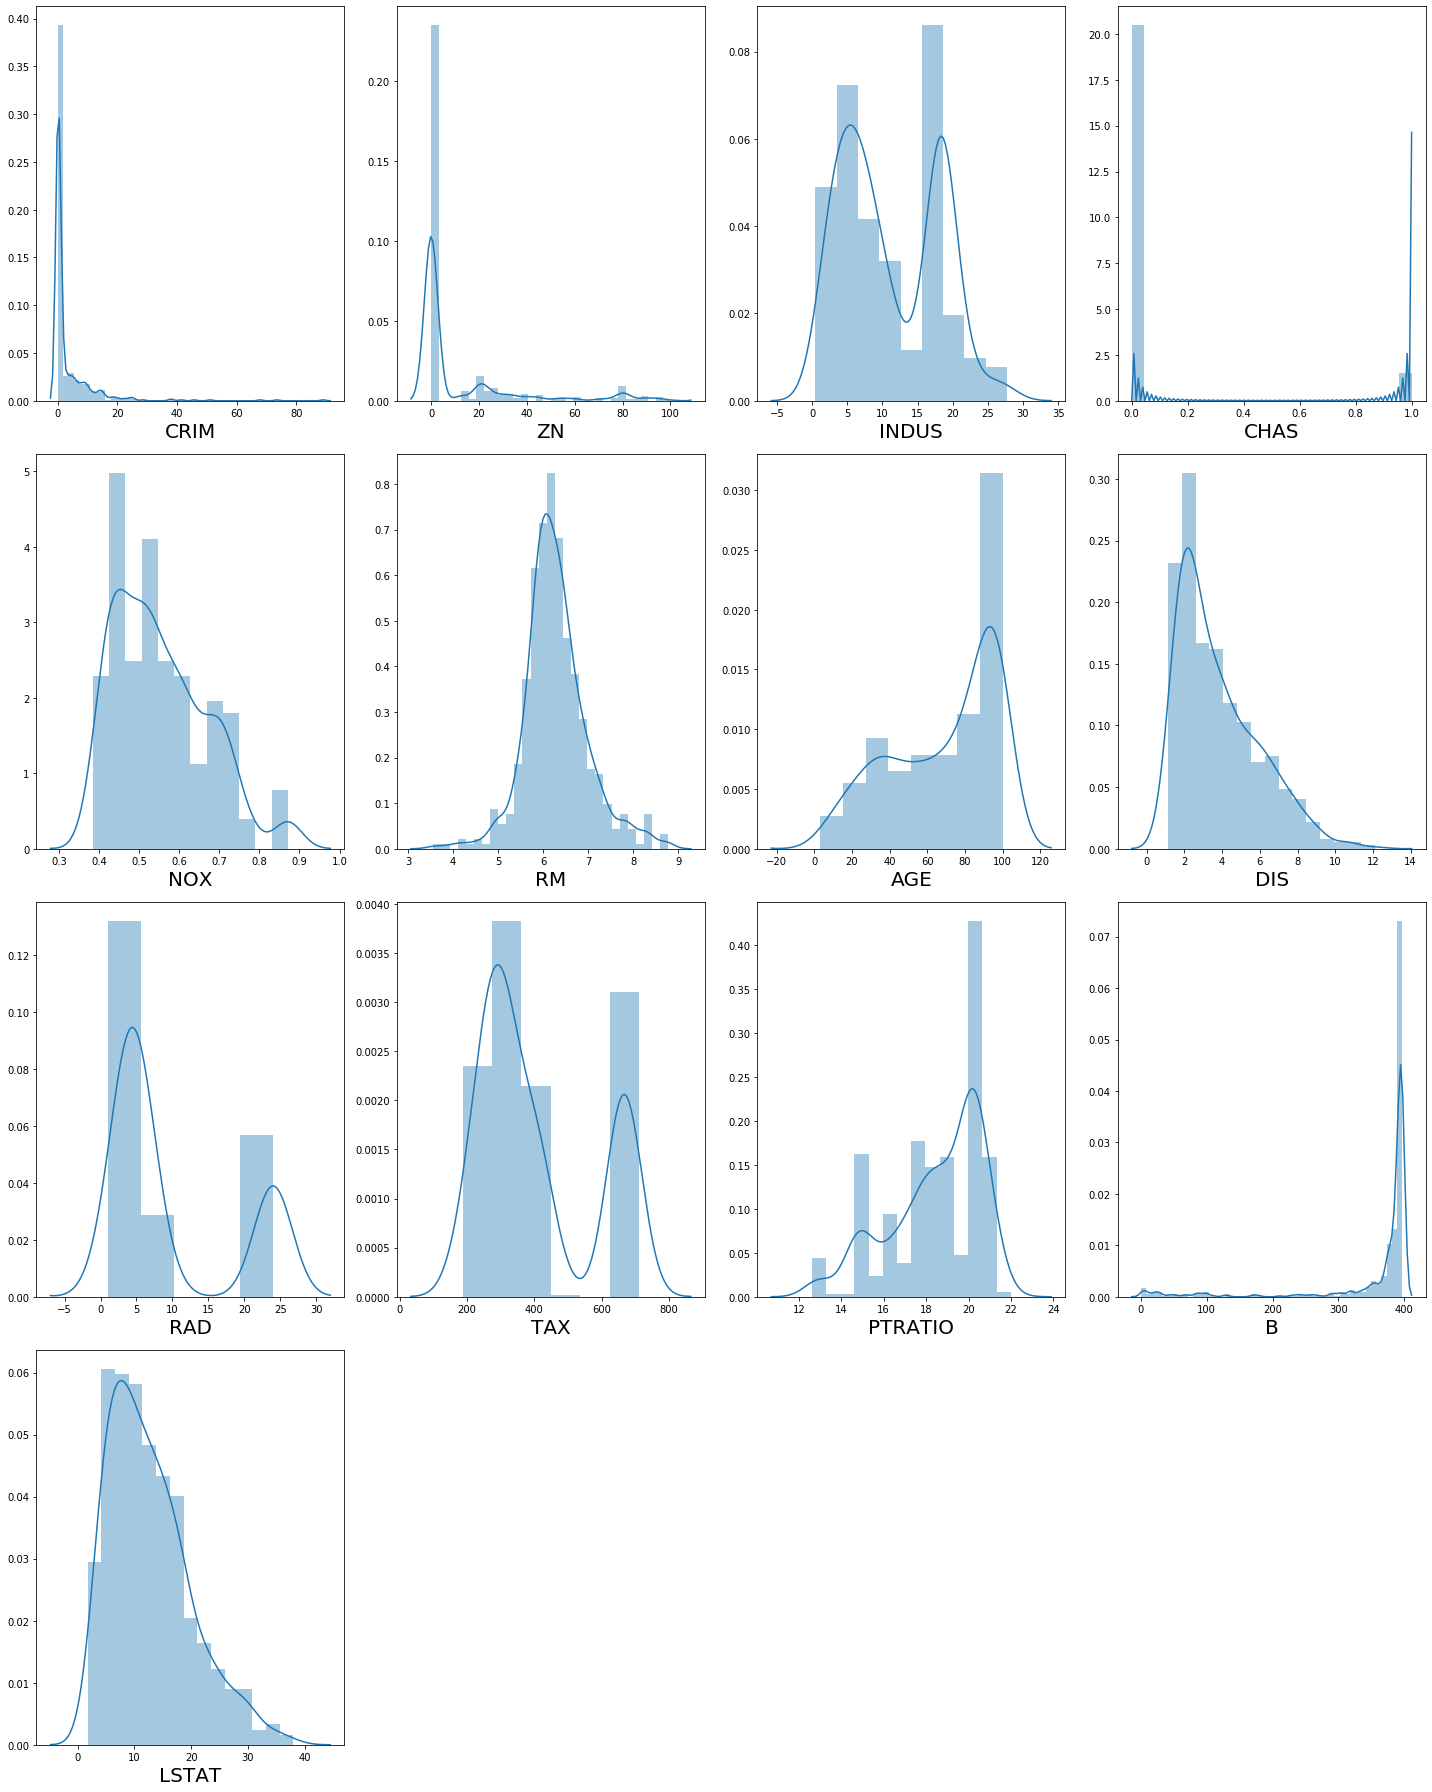

In [22]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in bos.columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        #plt.hist(bos[i])
        sns.distplot(bos[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
temp=bos.drop(['Price'],axis=1)

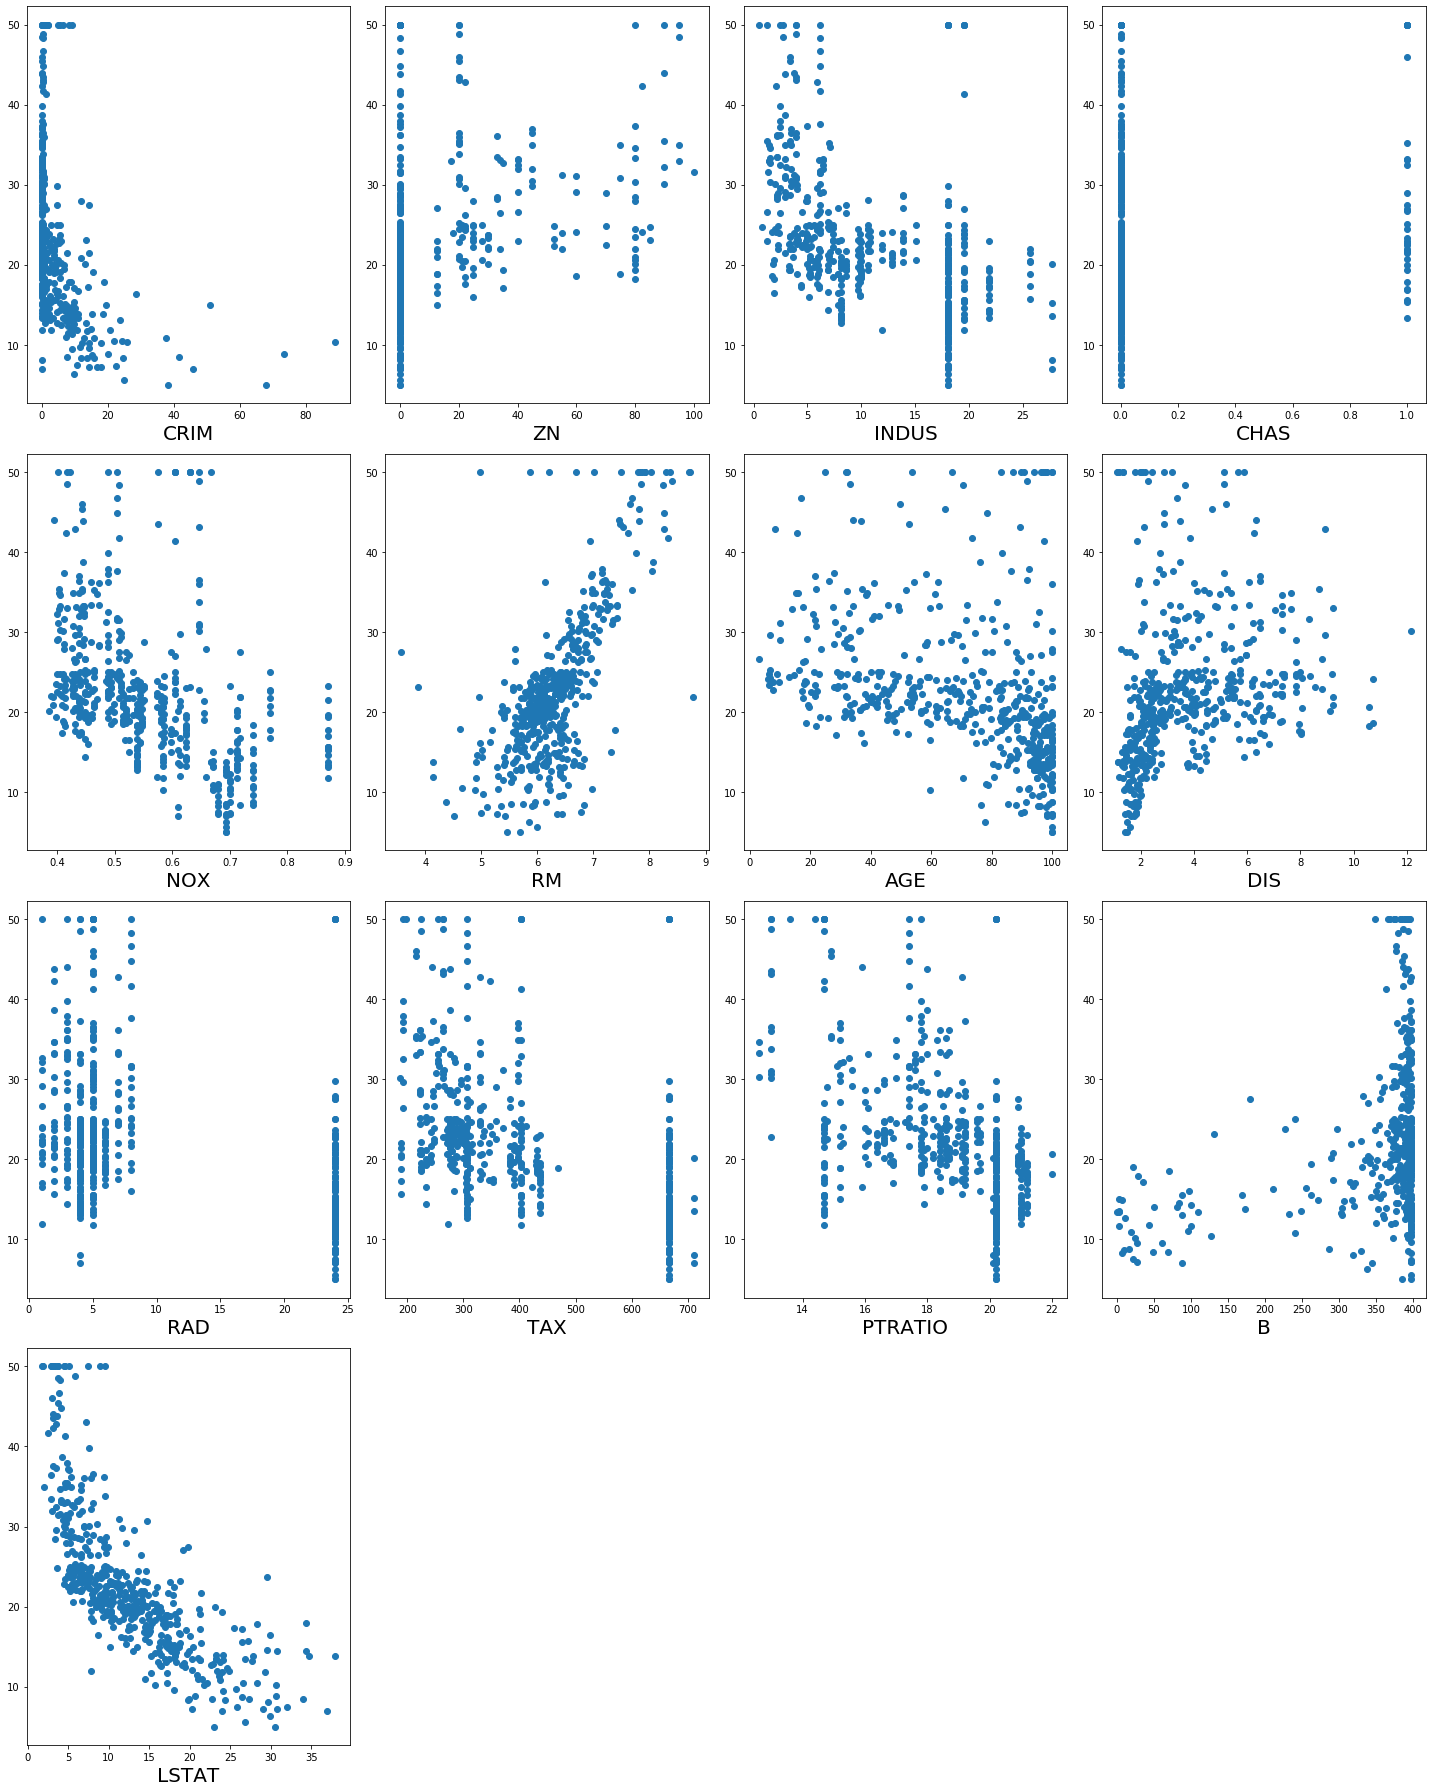

In [24]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in temp.columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        #plt.hist(bos[i])
        plt.scatter(temp[i],bos.Price)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
X=temp
y=bos.Price

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
X_trans=sc.fit_transform(X)

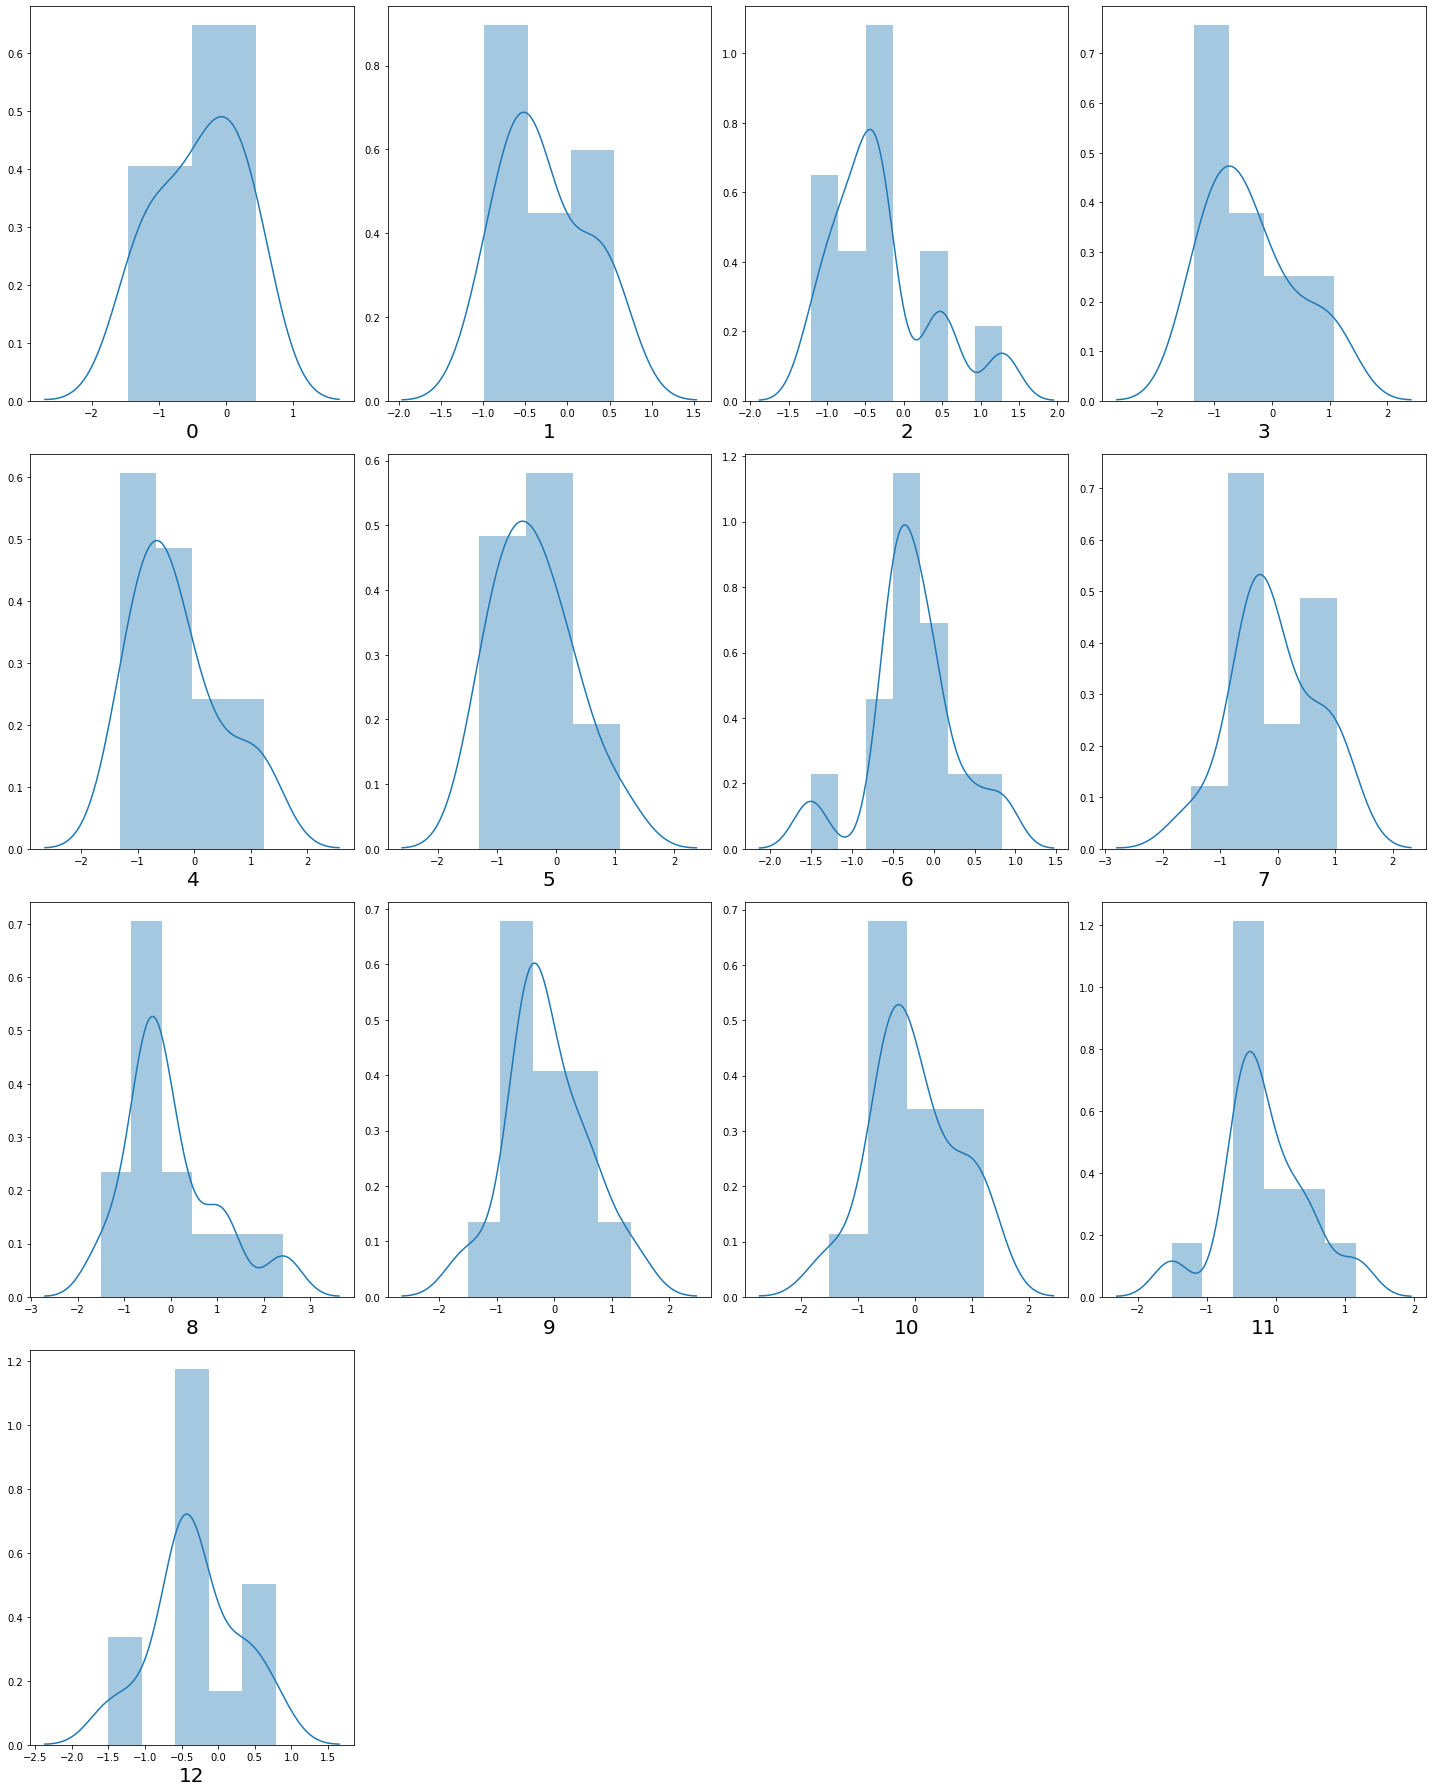

In [32]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in range(13):
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        #plt.hist(bos[i])
        sns.distplot(X_trans[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_trans,i) for i in range(X_trans.shape[1])]
vif['Features']=X.columns

In [44]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [50]:
bos.corr()['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [53]:
X=X.drop(['RAD','TAX'],axis=1)

In [54]:
X_trans=sc.fit_transform(X)

In [55]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_trans,i) for i in range(X_trans.shape[1])]
vif['Features']=X.columns

In [56]:
vif

,VIF,Features
0,1.478206,CRIM
1,2.154483,ZN
2,3.179166,INDUS
3,1.057805,CHAS
4,3.901348,NOX
5,1.872532,RM
6,3.075755,AGE
7,3.954443,DIS
8,1.496077,PTRATIO
9,1.316559,B


In [57]:
x_train,x_test,y_train,y_test = train_test_split(X_trans,y,test_size = 0.25,random_state=355)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr=LinearRegression()

In [61]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
lin_reg_score_train=lr.score(x_train,y_train)
lin_reg_score_train

0.7221847012235341

In [85]:
adj_r2(x_train,y_train,lr)

0.7138578121593893

In [86]:
lin_reg_score_test=lr.score(x_test,y_test)
lin_reg_score_test

0.7325448326094592

In [69]:
adj_r2(x_test,y_test,lr)

0.7069621644242771

In [71]:
from sklearn.linear_model import LassoCV

In [95]:
las_cv=LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)

In [96]:
las_cv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [97]:
las_cv.alphas_

array([0.33837643, 0.31557099, 0.29430256, 0.27446755, 0.25596936,
       0.23871788, 0.2226291 , 0.20762464, 0.19363143, 0.18058132,
       0.16841075, 0.15706043, 0.14647508, 0.13660315, 0.12739655,
       0.11881045, 0.11080303, 0.10333527, 0.09637082, 0.08987575,
       0.08381843, 0.07816934, 0.07290099, 0.06798771, 0.06340556,
       0.05913224, 0.05514693, 0.05143021, 0.04796398, 0.04473137,
       0.04171663, 0.03890507, 0.036283  , 0.03383764, 0.0315571 ,
       0.02943026, 0.02744676, 0.02559694, 0.02387179, 0.02226291,
       0.02076246, 0.01936314, 0.01805813, 0.01684107, 0.01570604,
       0.01464751, 0.01366031, 0.01273966, 0.01188105, 0.0110803 ,
       0.01033353, 0.00963708, 0.00898758, 0.00838184, 0.00781693,
       0.0072901 , 0.00679877, 0.00634056, 0.00591322, 0.00551469,
       0.00514302, 0.0047964 , 0.00447314, 0.00417166, 0.00389051,
       0.0036283 , 0.00338376, 0.00315571, 0.00294303, 0.00274468,
       0.00255969, 0.00238718, 0.00222629, 0.00207625, 0.00193

In [98]:
las_cv.coef_

array([-0.31953465,  0.73479172, -0.4194293 ,  0.94568598, -1.37507015,
        3.27607501, -0.17531758, -2.26922641, -1.65586462,  0.62085794,
       -2.99886841])

In [99]:
lr.coef_

array([-0.44844084,  1.05217386, -0.58045169,  1.07065506, -1.63689397,
        3.2846196 , -0.53018666, -3.20142755, -1.63652242,  0.68495411,
       -2.90424329])

In [100]:
alpha=las_cv.alpha_
alpha

0.005913224207167832

In [103]:
lasso_reg_score_train=las_cv.score(x_train,y_train)
lasso_reg_score_train

0.7190991320253284

In [104]:
lasso_reg_score_test=las_cv.score(x_test,y_test)
lasso_reg_score_test

0.7334536996636629

In [94]:
from sklearn.linear_model import RidgeCV

In [113]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.92001707, 8.79379423, 4.13880643, 4.52478068, 2.24729723,
       3.35784046, 2.64156764, 8.09827242, 1.00263827, 3.25483709,
       9.81438128, 0.83858195, 8.55294272, 7.20999947, 2.04869727,
       2.01356304, 8.47015051, 5.53308591, 9.81783643, 4.69702956,
       4.29949536, 0.73612757, 7.40532408, 5.14323362, 2.46596389,
       3.75900599, 1.93400264, 6.78507473, 3.87899996, 2.9005099 ,
       0.17060782, 0.27287276, 7.78738378, 4.25020743, 1.69687035,
       9.89067351, 9.77710126, 1.85550789, 4.28408198, 4.98309537,
       7.2018595 , 0.89413877, 3.7780788 , 5.61863903, 1.50378335,
       6.59800763, 0.68539651, 3.88177125, 7.41431205, 1.27798534]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [106]:
ridgecv.alpha_

0.03869801017205465

In [108]:
ridge_reg_score_train=ridgecv.score(x_train,y_train)
ridge_reg_score_train

0.7211263798293204

In [109]:
ridge_reg_score_test=ridgecv.score(x_test,y_test)
ridge_reg_score_test

0.7299534261361825

In [110]:
ridgecv.coef_

array([-0.46163222,  0.90582302, -0.60724858,  1.04564462, -1.37973009,
        3.25173782, -0.4552726 , -2.69873777, -1.61686384,  0.69497473,
       -2.80006161])

In [111]:
from sklearn.linear_model import ElasticNetCV

In [115]:
elasticnetcv=ElasticNetCV(alphas=None,cv=10)
elasticnetcv.fit(x_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [116]:
elasticnetcv.coef_

array([-0.41256588,  0.80925067, -0.55935083,  1.00133046, -1.28691258,
        3.24479836, -0.34589213, -2.39418327, -1.61491085,  0.6768723 ,
       -2.82510704])

In [117]:
elasticnetcv.alpha_

0.08122804400292312

In [119]:
elasticnet_score_train=elasticnetcv.score(x_train,y_train)
elasticnet_score_train

0.7197325406669517

In [120]:
elasticnet_score_test=elasticnetcv.score(x_test,y_test)
elasticnet_score_test

0.7295309009805893

Training and Testing scores of the model using various regularisation techniques.

In [125]:
print("Training score of the model without regularisation : ",lin_reg_score_train*100)
print("Test score of the model without regularisation :     ",lin_reg_score_test*100)
print("Training score of the model with Lasso regression :  ",lasso_reg_score_train*100)
print("Test score of the model with Lasso regression :      ",lasso_reg_score_test*100)
print("Training score of the model with Ridge Regression :  ",ridge_reg_score_train*100)
print("Test score of the model with Ridge Regression :      ",ridge_reg_score_test*100)
print("Training score of the model with ElasticNet Regression : ",elasticnet_score_train*100)
print("Test score of the model with ElasticNet Regression :     ",elasticnet_score_test*100)

Training score of the model without regularisation :  72.21847012235341
Test score of the model without regularisation :      73.25448326094592
Training score of the model with Lasso regression :   71.90991320253283
Test score of the model with Lasso regression :       73.34536996636629
Training score of the model with Ridge Regression :   72.11263798293204
Test score of the model with Ridge Regression :       72.99534261361825
Training score of the model with ElasticNet Regression :  71.97325406669518
Test score of the model with ElasticNet Regression :      72.95309009805892


Even after using different types of regularisation techniques we are getting the same r2 score approximately, Hence we can conclude that our model is not overfitted.

In [131]:
import pickle

In [132]:
# saving the model to the local file system
filename = 'finalized_linear_model.pickle'
pickle.dump(lr, open(filename, 'wb'))

In [133]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO',
       'B', 'LSTAT'],
      dtype='object')

In [136]:
X.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [137]:
sc.transform([[0.0632,18.00000,2.31,0,0.538,6.575,65.2,4.09,15.3,396.9,4.98]])

array([[-0.41316263,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -1.45900038,  0.44105193,
        -1.0755623 ]])

In [138]:
X_trans[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -1.45900038,  0.44105193,
       -1.0755623 ])

In [144]:
filename = 'scaler_linear_model.pickle'
pickle.dump(sc, open(filename, 'wb'))

In [145]:
sc1=pickle.load(open(filename,'rb'))

In [146]:
sc1.transform([[0.0632,18.00000,2.31,0,0.538,6.575,65.2,4.09,15.3,396.9,4.98]])

array([[-0.41316263,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -1.45900038,  0.44105193,
        -1.0755623 ]])